## Programming Exercises Week 3

This week, we will review linear regression and start using linear classification models. 

### 1. Least squares classification

__Question 1.__ Scikit learn has a number of built-in functions that enable you to generate datasets for classification. Among those functions, you can find the 'make_classification' and 'make_blobs' functions. The last one gives  you the possibility to set up the position of each cluster as well as their standard deviation. Consider the dataset given below, which was generated by . Using what we have done in regression, how could we learn a classification model for this dataset? (recall that a classification model is nothing else than a function $f(\boldsymbol x)\; :\; \boldsymbol x \rightarrow C_k$ mapping a prototype $\boldsymbol x$ into one of the classes $C_k$)


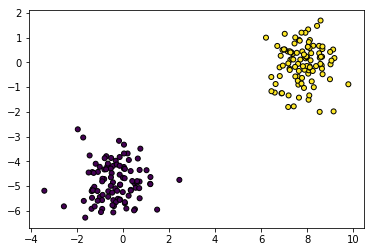

In [18]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=.8)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()

In [ ]:
# put your code here




### 2. From binary classifiers to the multi-class problem.

__Question 2. What is the simplest extension from the binary problem to the multi-class problem? "One vs One" and "One vs the rest"__ 

The price of the one-vs-the rest and the one-vs-one classifiers. Two relatively straighforward extensions of the binary classifier to the multiclass problem are the so-called one vs one and one vs rest classifiers. In the former, one learn K(K-1)/2 classifiers (why?) between each pair of clusters. A new prototype is then classified according to a majority vote. 

In the latter, we learn $K-1$ classifiers separating $+1$ prototypes (inside cluster $C_k$) from $-1$ prototypes (outside cluster $C_k$). A new prototype is the classified in the cluster that gives him a non negative label (what happens if two cluster both give a non negative label to the prototype?)

Using the dataset below, learn both one-vs-one and one-vs-rest classifiers and represent their boundaries using meshgrid. 

- First code the classifiers from scratch.  
- Then use the corresponding functions from scikit-learn

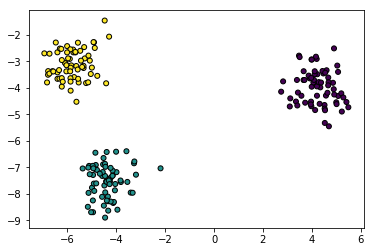

In [21]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.6)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()


# put your code here



__Question 3. Learning multiple discriminants simultaneously__ As you may have seen while coding the one-vs-one and one-vs-rest classifiers, a number of issues may arise when considering such extensions. In particular, when considering discriminant functions (+1/-1 choice) without taking into account the magnitude of the predictions, it might be unclear how to classify a protoype that falls in multiple clusters. For this reason, a more general alternative is often preferred. One approach is to learn the $K$ classifiers at once. That is to say, we learn a model of the form

\begin{align}
y_k(\boldsymbol x) = \boldsymbol w_k^T\boldsymbol x + w_{k,0}
\end{align}

We then classify a new prototype in the cluster which gives $y_k(\boldsymbol x) > y_j(\boldsymbol x)$ for all $j$. One can show that such classifier lifts the ambiguities that were inherent to the one-vs-one and one-vs-rest classifiers. To learn such a classifier, we proceed as in the linear regression model, by introducing $\tilde{\boldsymbol x} = [1, \boldsymbol x]$ and writing the system in matrix form as

\begin{align}
\boldsymbol y(\boldsymbol x) = \boldsymbol W^T \tilde{\boldsymbol x} 
\end{align}

Here $\boldsymbol W$ is the matrix whose $k^{th}$ column contains the vector of weights $\tilde{\boldsymbol w} = [w_{k,0}, \boldsymbol w_k]$


The solution can then be obtained by minimizing the sum of squares error function as in regression. Here we will code each prototype through a target vector in which all the entries are set to $0$ except the one corresponding to the class of the prototype. The solution is given by 

\begin{align}
\boldsymbol W = \tilde{\boldsymbol X}^\dagger \boldsymbol T
\end{align}

Here $\tilde{\boldsymbol X}^\dagger$ is the pseudo inverse of the matrix $\tilde{\boldsymbol X}$ encoding the prototypes $\tilde{\boldsymbol x} = [1, {\boldsymbol x}]$, $\boldsymbol T$ is the matrix whose rows are encoding the target vectors $\boldsymbol t_n^T$


Apply this idea to the three classes dataset above. Then use the function 'Multioutput regression' from scikit learn to verify your results. Plot the classifier using meshgrid. 


In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=.6)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()


# put your code here

### 3. Towards logistic regression. 

__Question 4.__ One can show that the multiclass regression classifier ensures that the labels sum to one. I.e. for a new prototype $y(\boldsymbol x)$, provided that the targets are encoded through a one hot encoding, we have $\sum_k y_k(\boldsymbol x) = 1$. The vector $y_k(\boldsymbol x) $ may however have values larger than $1$. 

Ideally we would like to the ouput of the classifier to return a probability indicating how likely a prorotype is to lie in one cluster or another. To achieve this idea, a popular/tractable approach is to keep the linear model and use a sigmoid function to map the output of the linear model onto the $[0,1]$ interval. 

- Start by plotting the sigmoid function with pyplot. 


In [ ]:
import matplotlib.pyplot as plt

# put your code here

- In logistic regression, we model the posterior probability $p(\mathcal{C}_k|\boldsymbol x, \boldsymbol w)$ from the logistic function. For a binary classifier, we thus write 

\begin{align}
p(\mathcal{C}_0|\boldsymbol x, \boldsymbol w)  = \text{sigmoid}(w_0 + w_1x_i)
\end{align}

for the first class and 

\begin{align}
p(\mathcal{C}_1|\boldsymbol x, \boldsymbol w) = 1 - p(\mathcal{C}_0|\boldsymbol x, \boldsymbol w) 
\end{align}


for the second (in order for the posterior class probabilities to sum up to one)

- Start by learning a simple logistic regression classifier using scikit-learn for the 1D dataset show below and plot the classifier on top of the data. Proceed as follows:

     - Generate two 1D gaussian clusters sufficiently separated with distinct mean and std that make them sufficiently separable
     
     - Then use the logistic regression model from scikit-learn.   


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# put the code here


- As a second exercise, learn the logistic regression classifier to the 2D dataset below

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=.8)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()


# put the code here


__Question 5. Multiclass logistic regression__ The extension of the binary logistic regression model to the multiclass problem simply introduces linear models for the posterior probabilities (for the ratios of those proabilities to be fully honest) and hence, gives a model of the form

\begin{align}
p(\mathcal{C}_k|\boldsymbol x, \boldsymbol w) = \frac{\exp(w_{k,0} + \boldsymbol w^T\boldsymbol x)}{1+ \sum_{\ell=1}^{K-1} \exp(w_{\ell,0} + \boldsymbol w^T_\ell \boldsymbol x)}, k=1,\ldots, K_1
\end{align}

The last posterior probability is then set to ensure $\sum_{k} p(\mathcal{C}_k|\boldsymbol x, \boldsymbol w) = 1$, 

\begin{align}
p(\mathcal{C}_K|\boldsymbol x, \boldsymbol w) = \frac{1}{1+ \sum_{\ell=1}^{K-1} \exp(w_{\ell,0} + \boldsymbol w^T_\ell \boldsymbol x)}.
\end{align}

Using the multiclass regression model from scikit-learn, learn a classifer for the 10 classes dataset below. Then plot the class boundaries uwing meshgrid and the function 'predict'. 


The logistic regression classifier is part of a general family of classifiers known as generalized linear classifiers because of the non linear activation function that appears in front of the linear model.

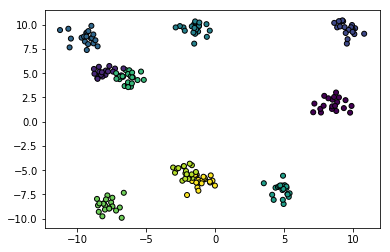

In [22]:

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=10, cluster_std=.6)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()


# put your code here



__Question 6. digit classification__ To conclude, we will see how a simple classifier can already hep us in automating digit recognition. Scikit-learn has built-in datasets of both low and higher resolution digit images.

- We will start with the low resolution dataset. Load the data below. Using the train_test_split function from scikit, split the images into a training set (lets say about $70\%$ of the images and keep the remaining $30\%$ for later validation). The proceed as follows

- If it is not already done, you must use a one-hot encoding procedure to store the value of the digit represented in each image. 

- Once you have the matrix representing the one-hot encodings, use the multiclass logistic regression model from scikit learn on your training set.

- Finally evaluate teh quality of your model using the remaining part of the data.


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()


# put your code here

__Question 7. digit classification II__ Now we will use the full resolution images from the MNIST dataset. Again, although the dataset is not stored in scikit-learn, you can in principle load it through the function 'fetch_mldata' of scikit. If you run into trouble with 'fetch_mldata', download the dataset directly in csv format on Kaggle https://www.kaggle.com/oddrationale/mnist-in-csv#mnist_train.csv
or as compressed file at 'http://yann.lecun.com/exdb/mnist/'.

Put the test set on the side for now. select a reasonable subset of the training images and fit scikit logistic regression classifier to that subset. Then try your model on a distinct subset of images and compute the error rate: [Number of correctly recognized digits]/total number of test images.


In [ ]:
# put your code here





### Least squares as a projection

In [ ]:
One way to view the classification problem is as a projection 

__Question 8. Towards Linear Discriminant Analysis__ Using scikit's LinearDiscriminantAnalysis and in particular the coeff_ and intercept_ attributes, project the data below onto a line and determine the optimal separation threshold for classification. Assume +1/-1 labels.  


In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

X1, Y1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=.8)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')


plt.show()